In [149]:
import pandas as pd
import numpy as np

In [150]:
train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/crop_recommendation/train_set_label.csv")

In [151]:
train_data.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,17.0,136.0,196.0,23.871923,90.499390,5.882156,103.054809,apple
1,49.0,69.0,82.0,18.315615,15.361435,7.263119,81.787105,chickpea
2,74.0,49.0,38.0,23.314104,71.450905,7.488014,164.497037,jute
3,104.0,35.0,28.0,27.510061,50.666872,6.983732,143.995555,coffee
4,23.0,72.0,84.0,19.020613,17.131591,6.920251,79.926981,chickpea


In [152]:
train_data.crop.nunique()

22

In [153]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/crop_recommendation/test_set_label.csv')

In [154]:
test_data.head()

,N,P,K,temperature,humidity,ph,rainfall
0,22.00000,51.00000,16.000000,27.965837,61.349001,8.639586,70.104721
1,130.20691,59.20691,18.586179,25.123987,82.356124,6.707583,91.431992
2,28.00000,27.00000,34.000000,32.454653,50.696938,6.526654,95.048716
3,40.00000,61.00000,22.000000,20.949818,65.810876,7.002216,44.239130
4,28.00000,46.00000,16.000000,29.008124,84.960894,6.664188,45.910114


In [155]:
train_data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.232892,-0.143022,0.014088,0.185919,0.080087,0.049705
P,-0.232892,1.000000,0.735456,-0.133283,-0.119861,-0.145958,-0.064344
K,-0.143022,0.735456,1.000000,-0.162041,0.188512,-0.193294,-0.054222
temperature,0.014088,-0.133283,-0.162041,1.000000,0.201797,-0.018037,0.000306
humidity,0.185919,-0.119861,0.188512,0.201797,1.000000,-0.011764,0.105829
ph,0.080087,-0.145958,-0.193294,-0.018037,-0.011764,1.000000,-0.138397
rainfall,0.049705,-0.064344,-0.054222,0.000306,0.105829,-0.138397,1.000000


In [156]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import GridSearchCV

In [157]:
train_data.shape

(1650, 8)

In [158]:
train_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64

In [159]:
le=LabelEncoder()
train_data.crop=le.fit_transform(train_data.crop)

In [160]:
train_data.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,17.0,136.0,196.0,23.871923,90.499390,5.882156,103.054809,0
1,49.0,69.0,82.0,18.315615,15.361435,7.263119,81.787105,3
2,74.0,49.0,38.0,23.314104,71.450905,7.488014,164.497037,8
3,104.0,35.0,28.0,27.510061,50.666872,6.983732,143.995555,5
4,23.0,72.0,84.0,19.020613,17.131591,6.920251,79.926981,3


In [161]:
train_data.corr()

,N,P,K,temperature,humidity,ph,rainfall,crop
N,1.000000,-0.232892,-0.143022,0.014088,0.185919,0.080087,0.049705,-0.032348
P,-0.232892,1.000000,0.735456,-0.133283,-0.119861,-0.145958,-0.064344,-0.487802
K,-0.143022,0.735456,1.000000,-0.162041,0.188512,-0.193294,-0.054222,-0.346647
temperature,0.014088,-0.133283,-0.162041,1.000000,0.201797,-0.018037,0.000306,0.115894
humidity,0.185919,-0.119861,0.188512,0.201797,1.000000,-0.011764,0.105829,0.196417
ph,0.080087,-0.145958,-0.193294,-0.018037,-0.011764,1.000000,-0.138397,0.004351
rainfall,0.049705,-0.064344,-0.054222,0.000306,0.105829,-0.138397,1.000000,0.051488
crop,-0.032348,-0.487802,-0.346647,0.115894,0.196417,0.004351,0.051488,1.000000


In [162]:
le_crop = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for crop:") 
print(le_crop)

Sklearn label encoder results for crop:
{'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


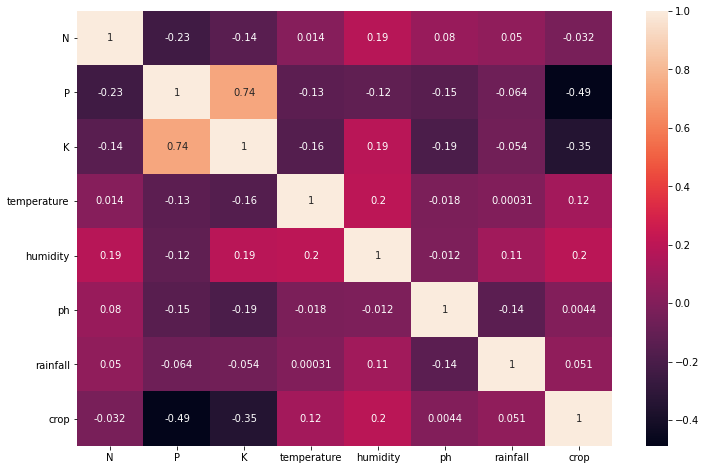

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(),annot=True)

In [164]:
x=train_data.drop('crop',axis=1).values
y=train_data['crop'].values

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

In [166]:
model_params={
    'svm':{
        'model':svm.SVC(gamma='auto'),
        'params':{
        'C':[1,5,10,20],
        'kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
        'n_estimators':[1,5,10,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,2,5,10,15,20]
             
        }
    },
    'naive_bayes_multinomial':{
        'model':MultinomialNB(),
        'params':{}
    }
    
}

In [167]:
scores=[]
for model_name, mp in model_params.items():
    clf=GridSearchCV(mp['model'], mp['params'], cv=6, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
    'model': model_name,

    'best_score': clf.best_score_,
    'best_params': clf.best_params_
    })

    df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.987888,"{'C': 20, 'kernel': 'linear'}"
1,random_forest,0.995959,{'n_estimators': 26}
2,logistic_regression,0.956346,{'C': 20}
3,naive_bayes_multinomial,0.721925,{}


In [168]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.25,random_state=42)

In [169]:
scaler=MinMaxScaler()

In [170]:
x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)

In [171]:
from sklearn.metrics import accuracy_score

In [172]:
test_data=scaler.transform(test_data)

In [173]:
model=RandomForestClassifier(n_estimators=26)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=26)

In [174]:
pred=model.predict(x_val)

In [175]:
pred

array([ 4, 17, 18,  9, 16, 13,  2, 19, 18,  3,  8,  1, 15,  2,  0,  2,  3,
        8, 16,  2, 20, 20,  9,  1, 18,  5, 14,  5,  8,  6,  2, 11, 12,  7,
        3,  9,  4,  1,  6,  8, 18, 19, 17,  8, 12, 15,  1, 19,  8, 10,  3,
       15, 14, 14, 21, 17,  9,  0,  7,  1, 12,  7,  0, 20, 11, 11, 14, 14,
       16, 14,  4, 15,  0, 17, 11, 18, 10, 18, 10,  2, 15,  2, 11, 11,  2,
        7, 17, 14,  5, 18, 11, 12, 14, 12,  3, 17,  5, 13, 20, 13, 10, 20,
       21,  1, 13, 14, 13, 19, 11, 21, 18,  2, 12,  7,  5, 20, 10,  3,  0,
       15, 10,  5,  5,  3, 12, 11, 14,  1, 14,  0, 14, 10, 17, 14, 11,  9,
        7, 17, 12, 15,  7, 11, 12, 20, 18, 17,  9, 14,  4, 21, 14, 12, 12,
        5,  3, 15, 17,  7, 19,  6, 11,  3, 17, 18, 10, 16, 10, 21,  0, 11,
        6, 15,  1, 13, 15, 13,  4,  3,  0,  9,  3, 17, 17, 20, 21,  8,  5,
        3, 21,  7, 11,  5, 11,  8, 14,  3,  2,  9, 14,  0, 17, 11,  6,  2,
        1, 14,  9, 18,  1, 16,  7, 20,  8,  5, 11, 12,  7, 21,  3,  0, 17,
        6, 13,  9,  4,  9

In [176]:
print('Accuracy Score is: ', accuracy_score(y_val, pred))

Accuracy Score is:  1.0


In [177]:
x_val

array([[2.79411765e-01, 7.14285714e-03, 1.00000000e-01, ...,
        9.64364570e-01, 4.10453359e-01, 6.14267652e-01],
       [4.26470588e-01, 3.57142857e-01, 2.10000000e-01, ...,
        9.26596822e-01, 5.01912970e-01, 7.91873352e-01],
       [2.50000000e-01, 5.00000000e-01, 9.50000000e-02, ...,
        4.31845354e-01, 1.92624802e-01, 6.17873882e-01],
       ...,
       [1.75674889e-01, 2.59328212e-02, 1.35270538e-01, ...,
        9.34757953e-01, 3.65412797e-01, 6.47028760e-01],
       [1.92851123e-01, 4.82708468e-01, 8.66214180e-02, ...,
        8.92110832e-02, 3.80220520e-01, 1.57846629e-01],
       [7.51526752e-01, 1.41374012e-01, 2.25519096e-01, ...,
        9.18669826e-01, 4.03136777e-01, 3.08472236e-05]])

In [178]:
predicted=model.predict(test_data)

In [179]:
predicted

array([13,  6, 12, 10, 14,  5, 10,  6, 10, 10,  8, 13, 16,  1,  4, 15,  7,
        5, 21, 14,  4, 20, 13, 11,  0, 16, 20, 21, 19, 13,  9, 14,  1, 17,
        2,  3,  9,  4, 10, 17,  7,  7, 20,  3,  7, 18, 21, 18, 21, 12, 11,
       12,  7, 18, 20,  9,  0,  4, 21,  0, 14,  5, 21, 14,  0,  9, 16,  7,
       21,  4, 11, 19,  6,  0, 11,  8, 13,  6,  6, 18, 18, 13,  1,  0,  9,
        6,  1,  3,  0, 11,  7, 16, 19,  2, 21, 13,  7,  0,  3, 16, 16, 15,
        4,  8, 16,  6, 18,  6,  6, 12, 19,  3, 11, 13,  5,  9,  1,  4, 10,
        8,  2,  5,  9, 14,  6, 17, 21,  4, 17,  2, 20, 13, 15, 13, 20, 14,
       19, 18,  5,  5, 12,  8,  8,  6,  3,  3, 17, 13, 16,  0,  5, 14, 11,
        3,  2, 10, 16,  9, 19, 17,  2, 12, 19,  8, 18, 13,  3, 15,  3, 10,
       12,  4,  1,  5, 20, 12, 21, 21,  8,  4, 18, 17, 20, 16,  6,  2, 18,
       12, 12,  2,  8, 16, 17, 11, 11,  6, 17, 15,  0,  5,  4, 21, 15, 15,
        4,  3, 11, 14,  6, 15, 13, 20, 10, 20,  9,  7, 18, 10,  8,  7, 11,
       11, 15, 12, 14,  1

In [180]:
predicted = le.inverse_transform(predicted)
predicted

array(['mothbeans', 'cotton', 'mango', 'lentil', 'mungbean', 'coffee',
       'lentil', 'cotton', 'lentil', 'lentil', 'jute', 'mothbeans',
       'orange', 'banana', 'coconut', 'muskmelon', 'grapes', 'coffee',
       'watermelon', 'mungbean', 'coconut', 'rice', 'mothbeans', 'maize',
       'apple', 'orange', 'rice', 'watermelon', 'pomegranate',
       'mothbeans', 'kidneybeans', 'mungbean', 'banana', 'papaya',
       'blackgram', 'chickpea', 'kidneybeans', 'coconut', 'lentil',
       'papaya', 'grapes', 'grapes', 'rice', 'chickpea', 'grapes',
       'pigeonpeas', 'watermelon', 'pigeonpeas', 'watermelon', 'mango',
       'maize', 'mango', 'grapes', 'pigeonpeas', 'rice', 'kidneybeans',
       'apple', 'coconut', 'watermelon', 'apple', 'mungbean', 'coffee',
       'watermelon', 'mungbean', 'apple', 'kidneybeans', 'orange',
       'grapes', 'watermelon', 'coconut', 'maize', 'pomegranate',
       'cotton', 'apple', 'maize', 'jute', 'mothbeans', 'cotton',
       'cotton', 'pigeonpeas', 'pige

In [181]:
result=pd.DataFrame(predicted)
result.columns=['prediction']

In [182]:
submission=result
submission.to_csv('submissions.csv',index=False)

In [183]:
submissions.head()

,prediction
0,mothbeans
1,cotton
2,mango
3,lentil
4,mungbean
